In [1]:
from maad.util import plot2d, power2dB
from maad.sound import (load, spectrogram,
                       remove_background, median_equalizer,
                       remove_background_morpho,
                       remove_background_along_axis, sharpness)
import numpy as np

from timeit import default_timer as timer

import matplotlib.pyplot as plt

In [7]:
audio_file = 'D:/PhD/audio_recorder_downloads_wavs/Tarcutta_April_May_2021/WetA/20210427_AAO/30sec/audio_segment_17.wav'

In [16]:
import scipy.io.wavfile as wavfile
import numpy
import os.path

def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

def snr(file):
    if (os.path.isfile(file)):
        data = wavfile.read(file)[1]
        singleChannel = data
    try:
        singleChannel = np.sum(data, axis=1)
    except:
        pass

    norm = singleChannel / (max(numpy.amax(singleChannel), -1 * numpy.amin(singleChannel)))
    return signaltonoise(norm)

print("SNR: " + str(snr(audio_file)))

SNR: 0.06859814654002776


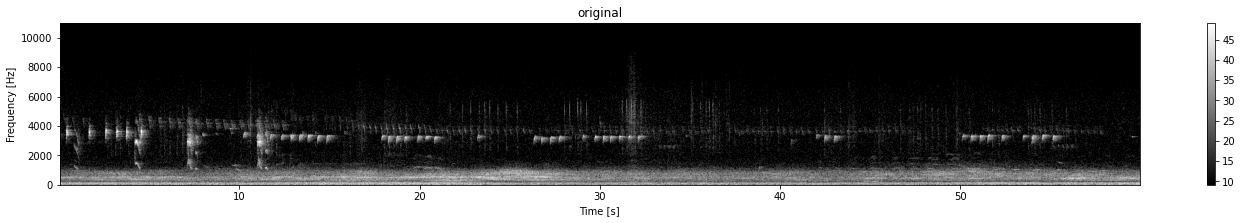

Original sharpness : 3.898


In [2]:


s, fs = load(audio_file)
Sxx, tn, fn, ext = spectrogram(s, fs, fcrop=[0,20000], tcrop=[0,60])
Sxx_dB = power2dB(Sxx, db_range=96) + 96
plot2d(Sxx_dB, extent=ext, title='original',
       vmin=np.median(Sxx_dB), vmax=np.median(Sxx_dB)+40)

print ("Original sharpness : %2.3f" % sharpness(Sxx_dB))

---- test remove_background -----
duration 0.104 s
sharpness : 2.739


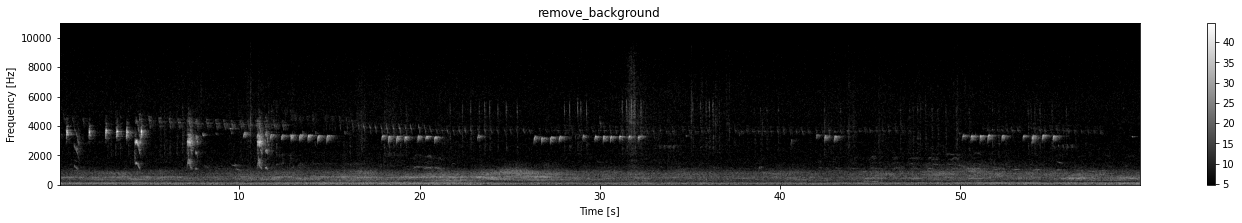

(<AxesSubplot:title={'center':'remove_background'}, xlabel='Time [s]', ylabel='Frequency [Hz]'>,
 <Figure size 1423.95x230.45 with 2 Axes>)

In [19]:
start = timer()
X1, noise_profile1, _ = remove_background(Sxx_dB)
elapsed_time = timer() - start
print("---- test remove_background -----")
print("duration %2.3f s" % elapsed_time)
print ("sharpness : %2.3f" % sharpness(X1))

plot2d(X1, extent=ext, title='remove_background',
       vmin=np.median(X1), vmax=np.median(X1)+40)

---- test median_equalizer -----
duration 0.195 s
sharpness : 1.411


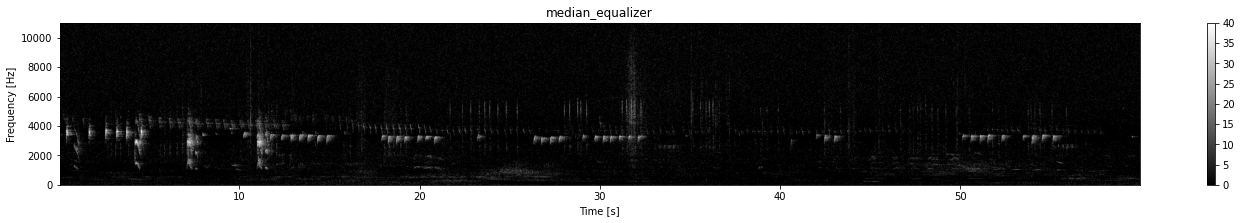

(<AxesSubplot:title={'center':'median_equalizer'}, xlabel='Time [s]', ylabel='Frequency [Hz]'>,
 <Figure size 1423.95x230.45 with 2 Axes>)

In [4]:
start = timer()
X2 = median_equalizer(Sxx)
X2 = power2dB(X2)
elapsed_time = timer() - start
print("---- test median_equalizer -----")
print("duration %2.3f s" % elapsed_time)
print ("sharpness : %2.3f" %sharpness(X2))

plot2d(X2,extent=ext, title='median_equalizer',
       vmin=np.median(X2), vmax=np.median(X2)+40)

---- test remove_background_morpho -----
duration 1.104 s
sharpness : 1.638


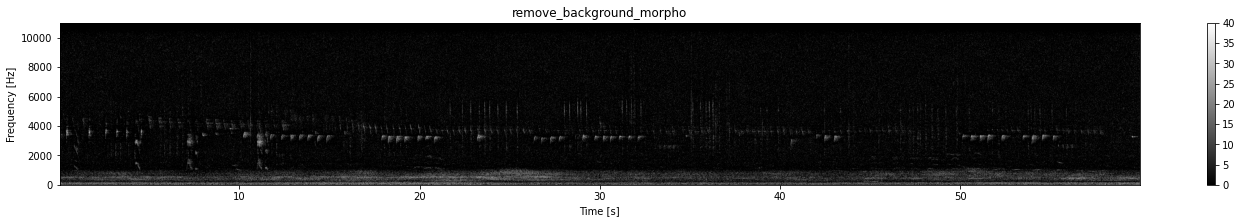

(<AxesSubplot:title={'center':'remove_background_morpho'}, xlabel='Time [s]', ylabel='Frequency [Hz]'>,
 <Figure size 1423.95x230.45 with 2 Axes>)

In [5]:
start = timer()
X3, noise_profile3,_ = remove_background_morpho(Sxx_dB, q=0.95)
elapsed_time = timer() - start
print("---- test remove_background_morpho -----")
print("duration %2.3f s" % elapsed_time)
print ("sharpness : %2.3f" %sharpness(X3))

plot2d(X3, extent=ext, title='remove_background_morpho',
       vmin=np.median(X3), vmax=np.median(X3)+40)

---- test remove_background_along_axis -----
duration 0.074 s
sharpness : 1.868


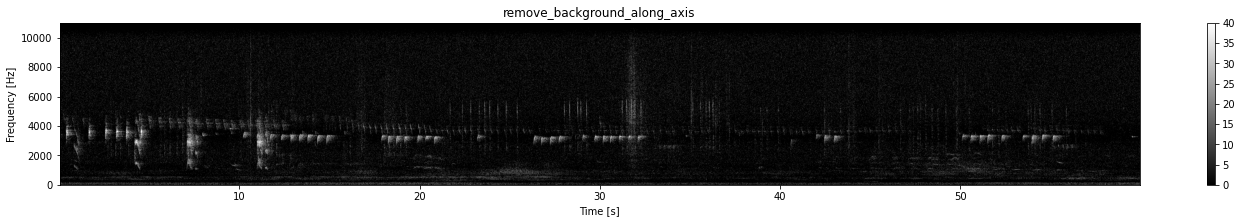

<Figure size 432x288 with 0 Axes>

In [6]:
start = timer()
X4, noise_profile4 = remove_background_along_axis(Sxx_dB,mode='median', axis=1)
#X4 = power2dB(X4)
elapsed_time = timer() - start
print("---- test remove_background_along_axis -----")
print("duration %2.3f s" % elapsed_time)
print ("sharpness : %2.3f" %sharpness(X4))

plot2d(X4,  extent=ext, title='remove_background_along_axis',
       vmin=np.median(X4), vmax=np.median(X4)+40)

plt.tight_layout()